# CE 599 UQ - Random variables and descriptive statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## Some probability distibutions, their PDF / CDF and main descriptors

scipy.stats offers a number of well-known distributions such as Gaussian, lognormal, uniform etc

### Univariate Gaussian

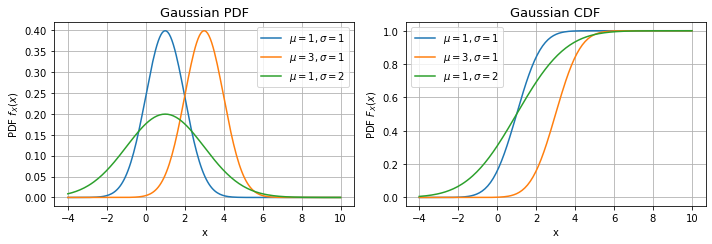

In [2]:
# Plot of a Gaussian pdf for different values of location (mean) and scale (standard deviation) parameters
from scipy.stats import norm

fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))

x_values = np.linspace(-4, 10, 200)

# loop over various values of the loc and scale parameter, look up enumerate, zip function on Google if unknown
for loc, scale in zip([1, 3, 1], [1, 1, 2]):
    distribution = norm(loc=loc, scale=scale)
    ax[0].plot(x_values, distribution.pdf(x_values), label=r'$\mu={}, \sigma={}$'.format(loc, scale))
    ax[1].plot(x_values, distribution.cdf(x_values), label=r'$\mu={}, \sigma={}$'.format(loc, scale))
    
for i in range(2):
    ax[i].set_xlabel('x')
    ax[i].grid('True')
    ax[i].legend()
ax[0].set_ylabel(r'PDF $f_{X}(x)$')
ax[0].set_title('Gaussian PDF', fontsize=13)
ax[1].set_ylabel(r'PDF $F_{X}(x)$')
ax[1].set_title('Gaussian CDF', fontsize=13)
    
fig.tight_layout()
plt.show()

### Lognormal distribution

In [3]:
# Define a function that computes the descriptive statistics of the lognormal distribution (mean, variance)
# scipy.stats has a weird way to define a lognormal distribution, check it out on the website
from scipy.stats import lognorm

def compute_statistics_lognormal(lamda, xi, use_scipy_stats=True):
    # if compute by hand, use the formula from lecture
    if not use_scipy_stats:   # use_scipy_stats is a boolean 
        mean_lognormal = np.exp(lamda + xi ** 2 / 2)
        var_lognormal = (np.exp(xi ** 2) - 1.) * np.exp(2 * lamda + xi ** 2)
    # otherwise use scipy.stats functions
    else:
        distribution = lognorm(scale=np.exp(lamda), s=xi)
        mean_lognormal = distribution.mean()
        var_lognormal = distribution.var()
    return mean_lognormal, var_lognormal

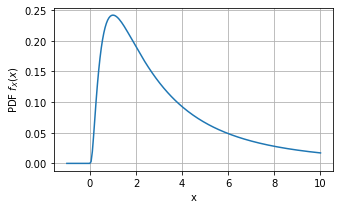

Mean and variance computed by hand = 4.48, 34.51
Mean and variance computed using scipy.stats = 4.48, 34.51


In [4]:
lamda, xi = 1., 1.

fig, ax = plt.subplots(figsize=(5, 3.))
x_values = np.linspace(-1, 10, 200)
ax.plot(x_values, lognorm(scale=np.exp(lamda), s=xi).pdf(x_values))
ax.set_xlabel('x')
ax.grid('True')
ax.set_ylabel(r'PDF $f_{X}(x)$')
plt.show()

m, v = compute_statistics_lognormal(lamda, xi, use_scipy_stats=False)
print('Mean and variance computed by hand = {:.2f}, {:.2f}'.format(m, v))

m, v = compute_statistics_lognormal(lamda, xi, use_scipy_stats=True)
print('Mean and variance computed using scipy.stats = {:.2f}, {:.2f}'.format(m, v))

In [5]:
# Compute the skewness coefficient
# it is positive because the distribution is positive skewed, also called right-skewed
lamda, xi = 1., 1.
distribution = lognorm(scale=np.exp(lamda), s=xi)
print('Skewness coefficient = {}'.format(distribution.stats('s')))

Skewness coefficient = 6.184877138632554


### t-Student distribution

The t-Student distribution is symmetric, but it has a higher kurtosis than the Gaussian distribution (heavier tails). It tends towards Gaussianity as the number of degrees of freedom increases towards infinity.

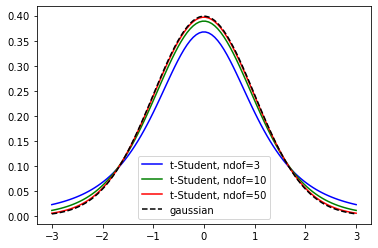

In [6]:
from scipy.stats import t
fig, ax = plt.subplots()
xx = np.linspace(-3, 3, 100)
# plot pdf of standard t-student distribution with varying number of degrees of freedom
for ndof, color in zip([3, 10, 50], ['blue', 'green', 'red']):
    ax.plot(xx, t(loc=0, scale=1, df=ndof).pdf(xx), label='t-Student, ndof={}'.format(ndof), color=color)
# compare with Gaussian
ax.plot(xx, norm(loc=0, scale=1).pdf(xx), label='gaussian', color='black', linestyle='--')
ax.legend()
plt.show()

## Central limit theorem

The distribution of the sample mean tends towards Gaussianity as the size of the sample increases. More precisely, if $x_i, i=1:N$ are iid samples from a RV $X$ with mean $\mu$ and variance $\sigma^2$, then for large enough $N$, the distribution of the sample mean $\bar{X}=\frac{1}{N}\sum_{i} x_i$ is $\bar{X} \sim N(\mu, \frac{\sigma^2}{N})$.

True mean = 3.4729347993368256
Distribtution of sample mean


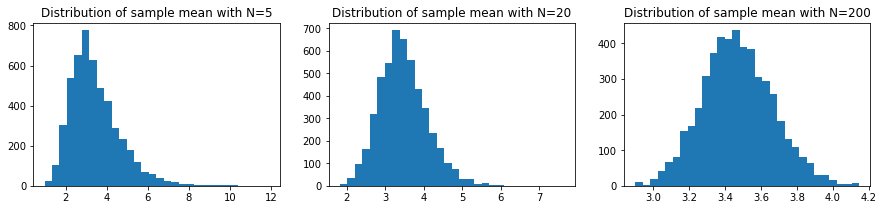

In [15]:
# Define a lognormal distribution
lognorm_d = lognorm(scale=np.exp(1.), s=0.7)
print('True mean = {}'.format(lognorm_d.mean()))

# Let's take a sample of iid realizations from a lognormal distribution and compute the mean
def compute_mean_from_lognormal_sample(sample_size):
    sample = lognorm_d.rvs(size=(sample_size, ))
    return np.mean(sample)

# Let's do that several times and look at the distribution of the means
print('Distribtution of sample mean')
fig, ax = plt.subplots(ncols=3, figsize=(15, 3))
for i, N in enumerate([5, 20, 200]):
    all_means = []
    for _ in range(5000):
        m = compute_mean_from_lognormal_sample(sample_size=N)
        all_means.append(m)
    ax[i].set_title('Distribution of sample mean with N={}'.format(N))
    ax[i].hist(all_means, bins=30)
    #ax[i].set_xlim([0, 8])
plt.show()

You can play with the sample size N above and see that the distribution looks more and more like a normal distribution as the sample size increases. Also, the variance of the histogram (standard error on the mean) reduces as the sample size N increases.

## Multiple random variables: plot of bivariate Gaussian

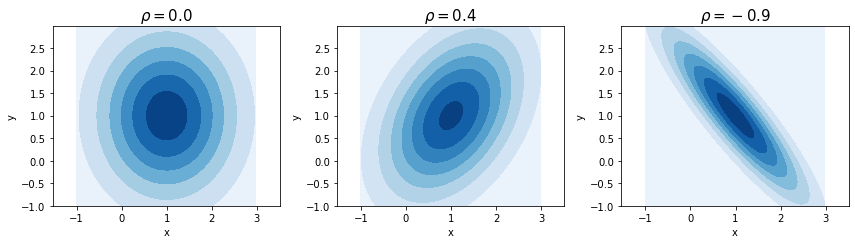

In [8]:
# Define a bivariate Gaussian and plot the pdf as contours for different values of the correlation coef.
from scipy.stats import multivariate_normal

fig, ax = plt.subplots(ncols=3, figsize=(12, 3.5))
x_values, y_values = np.mgrid[-1:3:.02, -1:3:.02]
pos = np.dstack((x_values, y_values))
# google the enumerate function if unknown
for i, rho in enumerate([0., 0.4, -0.9]):
    mu1, mu2 = 0., 1.
    sigma1, sigma2 = 1., 1.2
    bivariate_normal = multivariate_normal(
        mean=[mu2, mu2], cov=[[sigma1 ** 2, rho * sigma1 * sigma2], [rho * sigma1 * sigma2, sigma2 ** 2]])
    ax[i].contourf(x_values, y_values, bivariate_normal.pdf(pos), cmap='Blues')
    ax[i].set_title(r'$\rho = {}$'.format(rho), fontsize=15)
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].axis('equal')
fig.tight_layout()
plt.show()

## Compute descriptive statistics from data

When you get some data you can use this sample to compute the sample mean, sample variance / covariance, which are **estimates** of the true mean and true variance of the population. Also, you can plot a histogram, which is an approximation of a PDF.

In [9]:
filename = os.getcwd() + '/data_rainfall_CA.csv'
data = pd.read_csv(filename, header=0)    # read csv file, the first row contains column names
data.set_index('Season', inplace=True)    # set the column 'Season' as the index of the table
data.tail()

,DowntownLA,LAX,SanFrancisco
Season,,,
2016-2017,19.00,16.33,32.34
2017-2018,4.79,3.87,17.53
2018-2019,18.82,16.94,25.72
2019-2020,14.86,13.19,11.70
2020-2021,5.82,5.00,8.96


In [10]:
# Plot histogram and compute sample mean and sample variance for rainfall in downtown LA
# dropna drops the nan values
data_numeric = data['DowntownLA'].dropna().to_numpy()

s_m = np.mean(data_numeric)
s_v = np.var(data_numeric, ddof=1)
print('Sample mean and sample variance = {:.2f}, {:.2f}'.format(s_m, s_v))

Sample mean and sample variance = 14.67, 49.14


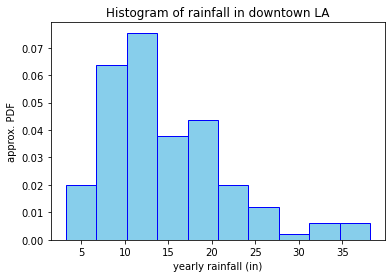

In [11]:
fig, ax = plt.subplots()
ax.hist(data_numeric, density=True, color='skyblue', edgecolor='blue')
ax.set_xlabel('yearly rainfall (in)')
ax.set_ylabel('approx. PDF')
ax.set_title('Histogram of rainfall in downtown LA')
plt.show()

In [12]:
# Look at sample covariance between several values
data_numeric = data[['DowntownLA', 'LAX', 'SanFrancisco']].dropna().to_numpy()
cov = np.cov(data_numeric, rowvar=False)
print(cov)

[[55.08134491 42.13033782 37.56479631]
 [42.13033782 35.87643489 32.33180475]
 [37.56479631 32.33180475 58.63211288]]


In [13]:
# Find the correlation factors:
print('rho between downtown LA and LAX = {:.2f}'.format(cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])))
print('rho between downtown LA and San Francisco = {:.2f}'.format(cov[0, 2] / np.sqrt(cov[0, 0] * cov[2, 2])))

rho between downtown LA and LAX = 0.95
rho between downtown LA and San Francisco = 0.66


Makes sense, rainfall in downtown LA and LAX is highly correlated, less so between LA and San Francisco (but still non zero correlation)

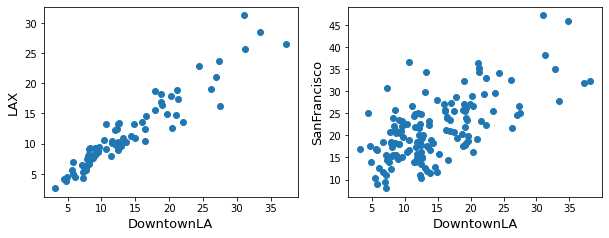

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
for i, yname in enumerate(['LAX', 'SanFrancisco']):
    ax[i].scatter(data['DowntownLA'].to_numpy(), data[yname].to_numpy())
    ax[i].set_xlabel('DowntownLA', fontsize=13)
    ax[i].set_ylabel(yname, fontsize=13)
plt.show()